In [75]:
import matplotlib.pyplot as plt
from simtk.openmm import app
from simtk import openmm, unit
from openeye import oechem
from sys import stdout
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import sys
import string

import lxml.etree as etree

from simtk.openmm.app import element as elem
from simtk.openmm.app import Topology

import os
import math
import copy
import re
import numpy
import random

from simtk import openmm, unit

import time

import itertools

from rdkit import Chem


import sys
import io
from IPython.nbformat import current
import openeye.oechem
import openeye.oeomega
import openeye.oequacpac

from openeye import oechem, oequacpac
from openeye.oechem import *
from openeye.oedepict import *
from IPython.core.display import Image, display
from openforcefield.typing.engines.smirnoff import forcefield_rdk
from openforcefield.typing.engines import smirnoff
#from openforcefield import *
from openforcefield.utils import *
# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/utils/")
# #from utils import *
# from utils import get_data_filename, extractPositionsFromOEMol, generateTopologyFromOEMol, extractPositionsFromRDKMol

# sys.path.insert(0, os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/typing/engines/smirnoff/")
# from forcefield import *
# from forcefield_utils import *

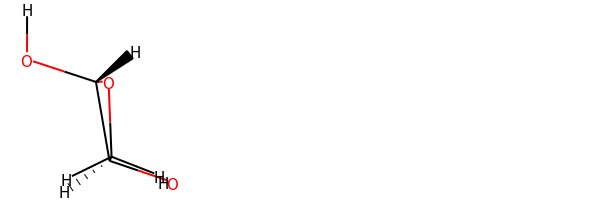

AlkEthOH_r0
     RDKit          3D

 12 12  0  0  0  0  0  0  0  0999 V2000
    0.1466   -0.6972   -1.2190 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1072   -0.7754    0.3061 C   0  0  2  0  0  0  0  0  0  0  0  0
   -0.1521    0.7339    0.2375 C   0  0  1  0  0  0  0  0  0  0  0  0
    0.0894    0.7465   -1.1920 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.3221   -1.1878    0.9520 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4710    1.1671    0.6094 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.0701   -1.0576   -1.6805 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7173   -1.1199   -1.7408 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7451   -1.3515    0.6836 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.6019    1.3396    0.7541 H   0  0  0  0  0  0  0  0  0  0  0  0
    1.1323   -1.1855    1.8998 H   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4701    2.1287    0.5135 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  4  1  0
  2  3  1  0
  2  5  1  0
  3  4  1  0
  3  6  1  0
  1  7

In [84]:
mol_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2"
ff_filename = os.path.dirname(os.path.abspath(os.path.join('..'))) + "/openforcefield/data/forcefield/smirnoff99Frosst.ffxml"
# mol_filename = "/home/shuzhe/Documents/openforcefield/openforcefield/data/molecules/MiniDrugBank_tripos.mol2"
mol = Chem.MolFromMol2File(mol_filename, sanitize = True, removeHs = False)
x = Draw.MolsToGridImage([mol])
display(x)

print Chem.MolToMolBlock(mol)
positions_rdk = extractPositionsFromRDKMol(mol)
#print positions

# atoms = mol.GetAtoms()
# print atoms[0].GetPropsAsDict()
# #print list(atoms[0].GetPropNames())
# atoms[0].SetDoubleProp("PartialCharge", 0.3)
# print atoms[0].GetPropsAsDict()["PartialCharge"]
# [float(a.GetPropsAsDict()["_TriposPartialCharge"]) if "_TriposPartialCharge" in a.GetPropsAsDict() else 0.0 for a in mol.GetAtoms()]

In [85]:

Chem.Draw.MolsToGridImage([mol],molsPerRow=1)


#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield_rdk.ForceField(ff_filename)
#forcefield = ForceField('/home/shuzhe/Documents/openforcefield/openforcefield/data/forcefield/Frosst_AlkEtOH_parmAtFrosst.ffxml')

# Create the OpenMM system
topology_rdk = smirnoff.forcefield_rdk.generateTopologyFromRDKMol(mol)
system_rdk = forcefield.createSystem(topology_rdk, [mol])

#g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology, topology, system, system, positions)

In [86]:
# mol_filename = '/home/shuzhe/Documents/openforcefield/examples/SMIRNOFF_simulation/AlkEthOH_r51.mol2'
# mol_filename = '/home/shuzhe/Documents/openforcefield/openforcefield/data/molecules/AlkEthOH_test_filt1_tripos.mol2'

# Load molecule using OpenEye tools
mol = oechem.OEGraphMol()
ifs = oechem.oemolistream(mol_filename)
flavor = oechem.OEIFlavor_Generic_Default | oechem.OEIFlavor_MOL2_Default | oechem.OEIFlavor_MOL2_Forcefield
ifs.SetFlavor( oechem.OEFormat_MOL2, flavor)
oechem.OEReadMolecule(ifs, mol )
oechem.OETriposAtomNames(mol)

# Get positions in OpenMM-compatible format
positions_oe = extractPositionsFromOEMol(mol)
#print positions

# Load a SMIRNOFF small molecule forcefield for alkanes, ethers, and alcohols
forcefield = smirnoff.forcefield.ForceField(ff_filename)
#forcefield = ForceField('/home/shuzhe/Documents/openforcefield/openforcefield/data/forcefield/Frosst_AlkEtOH_parmAtFrosst.ffxml')

# Create the OpenMM system
topology_oe = smirnoff.forcefield.generateTopologyFromOEMol(mol)
system_oe = forcefield.createSystem(topology_oe, [mol])

g1,g2,e1,e2 = smirnoff.forcefield_utils.compare_system_energies(topology_oe, topology_rdk, system_oe, system_rdk, positions_oe, positions_rdk, skip_assert = True)


Num (type) 	 Num (type) 	 Num (type) 	 Num (type) 	 per 	 phase 	 k0
  1 ( C2)-   0 ( C1)- 	 3 ( O1)- 	   2 ( C3)- 	 3.000000 	 0.000000 	 1.602472 
  1 ( C2)-   0 ( C1)- 	 3 ( O1)- 	   2 ( C3)- 	 2.000000 	 180.000000 	 0.418400 
  4 ( O2)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 3.000000 	 0.000000 	 0.602496 
  4 ( O2)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 2.000000 	 0.000000 	 4.916200 
  5 ( O3)-   2 ( C3)- 	 1 ( C2)- 	   8 ( H3)- 	 3.000000 	 0.000000 	 0.000000 
  5 ( O3)-   2 ( C3)- 	 1 ( C2)- 	   8 ( H3)- 	 1.000000 	 0.000000 	 1.046000 
  0 ( C1)-   1 ( C2)- 	 2 ( C3)- 	   5 ( O3)- 	 3.000000 	 0.000000 	 0.652704 
  8 ( H3)-   1 ( C2)- 	 4 ( O2)- 	  10 ( H5)- 	 3.000000 	 0.000000 	 0.697333 
  4 ( O2)-   1 ( C2)- 	 0 ( C1)- 	   6 ( H1)- 	 3.000000 	 0.000000 	 0.000000 
  4 ( O2)-   1 ( C2)- 	 0 ( C1)- 	   6 ( H1)- 	 1.000000 	 0.000000 	 1.046000 
  8 ( H3)-   1 ( C2)- 	 2 ( C3)- 	   9 ( H4)- 	 3.000000 	 0.000000 	 0.627600 
  2 ( C3)-   1 ( C2)- 	 4 ( O2)- 	  10 ( H5)- 	 3

In [22]:
# rdk_mol = Chem.MolFromSmiles('c1ccnc(c1)S')
# rdk_mol.GetAtoms()[0].GetPropsAsDict()


# def compare_system_energies( topology0, topology1, system0, system1, positions0, positions1=None, label0="AMBER system", label1 = "SMIRNOFF system", verbose = True, skip_assert = False, skip_improper = False ):
#     """
#     Given two OpenMM systems, check that their energies and component-wise
#     energies are consistent, and return these. The same positions will be used
#     for both systems unless a second set of positions is provided.

#     Parameters
#     ----------
#     topology0 : OpenMM Topology
#         Topology of first system
#     topology1 : OpenMM Topology
#         Topology of second system
#     system0 : OpenMM System
#         First system for comparison (usually from AMBER)
#     system1 : OpenMM System
#         Second system for comparison (usually from SMIRNOFF)
#     positions0 : simtk.unit.Quantity wrapped
#         Positions to use for energy evaluation comparison
#     positions1 (optional) : simtk.unit.Quantity wrapped (optional)
#         Positions to use for second OpenMM system; original positions are used
#         if this is not provided
#     label0 (optional) : str
#         String labeling system0 for output. Default, "AMBER system"
#     label1 (optional) : str
#         String labeling system1 for output. Default, "SMIRNOFF system"
#     verbose (optional) : bool
#         Print out info on energies, True/False (default True)
#     skip_assert (optional) : bool
#         Skip assertion that energies must be equal within specified tolerance. Default False.
#     skip_improper (optional) : bool
#         Skip detailed checking of force terms on impropers (helpful here if comparing with AMBER force fields using different definitions of impropers.) Default False.

#     Returns
#     ----------
#         groups0 : dict
#             As returned by openmoltools.system_checker.check_energy_groups,
#             a dictionary with keys "bond", "angle", "nb", "torsion" and values
#             corresponding to the energies of these components for the first simulation object
#         groups1 : dict
#             As returned by openmoltools.system_checker.check_energy_groups,
#             a dictionary with keys "bond", "angle", "nb", "torsion" and values
#             corresponding to the energies of these components for the second simulation object
#         energy0 : simtk.unit.Quantity
#             Energy of first system
#         energy1 : simtk.unit.Quantity
#             Energy of second system

#     TO DO:
#         Allow energy extraction/comparison of terms specified by particular
#         SMARTS queries i.e. for specific bond, angle, or torsional terms.
#     """

#     # Create integrator
#     timestep = 1.0 * unit.femtoseconds
#     integrator0 = simtk.openmm.VerletIntegrator( timestep )
#     integrator1 = simtk.openmm.VerletIntegrator( timestep )

#     # Grab second positions
#     if positions1 == None:
#         positions1 = copy.deepcopy( positions0 )

#     # Create simulations
#     platform = simtk.openmm.Platform.getPlatformByName("Reference")
#     simulation0 = app.Simulation( topology0, system0, integrator0, platform = platform )
#     simulation0.context.setPositions(positions0)
#     simulation1 = app.Simulation( topology1, system1, integrator1, platform = platform )
#     simulation1.context.setPositions(positions1)

#     # Print what torsions were found if verbose
#     if verbose:
#         # Build list of atoms for debugging info
#         atoms0 = [ atom for atom in simulation0.topology.atoms() ]
#         atoms1 = [ atom for atom in simulation1.topology.atoms() ]
#         # Loop over first system and print torsion info
#         for force in simulation0.system.getForces():
#             if type(force) == mm.PeriodicTorsionForce:
#                 print("Num (type) \t Num (type) \t Num (type) \t Num (type) \t per \t phase \t k0")
#                 for k in range(force.getNumTorsions()):
#                     i0, i1, i2, i3, per, phase, k0 = force.getTorsionParameters(k)
#                     print("%3s (%3s)- %3s (%3s)- \t %s (%3s)- \t %3s (%3s)- \t %f \t %f \t %f " % (i0, atoms0[i0].name, i1, atoms0[i1].name, i2, atoms0[i2].name, i3, atoms0[i3].name, per, phase/unit.degree, k0/unit.kilojoule_per_mole) )
#         for force in simulation1.system.getForces():
#             if type(force) == mm.PeriodicTorsionForce:
#                 print("Num (type) \t Num (type) \t Num (type) \t Num (type) \t per \t phase \t k0")
#                 for k in range(force.getNumTorsions()):
#                     i0, i1, i2, i3, per, phase, k0 = force.getTorsionParameters(k)
#                     print("%3s (%3s)- %3s (%3s)- %3s (%3s)- %3s (%3s) - %f \t %f \t %f " % (i0, atoms1[i0].name, i1, atoms1[i1].name, i2, atoms1[i2].name, i3, atoms1[i3].name, per, phase/unit.degree, k0/unit.kilojoule_per_mole) )